In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as Na
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler as standard
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [85]:
df = pd.read_csv('online_shopper.csv')
df.shape

(12330, 18)

In [86]:
print(u'- Number of rows: {}'.format(df.shape[0]))
print(u'- Number of Columns: {}'.format(df.shape[1]))
print(u"- Name of indepent variables: {}".format(list(df.columns[:-1])))
print(u'- Name of dependent variable: {}'.format(list(df.columns[-1:])))
print(u"- Dataset shape: {}".format(df.shape))

- Number of rows: 12330
- Number of Columns: 18
- Name of indepent variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
- Name of dependent variable: ['Revenue']
- Dataset shape: (12330, 18)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [88]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [89]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [91]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [92]:
#Numerical and categocical columns
num_cols = [x for x in df.select_dtypes(include = np.number)]
cat_cols = [x for x in df.select_dtypes(exclude=np.number)]

print('Numerical columns: ', num_cols)
print('Categorical columns: ', cat_cols)

Numerical columns:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical columns:  ['Month', 'VisitorType', 'Weekend', 'Revenue']


Numerical columns plot and box plot

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

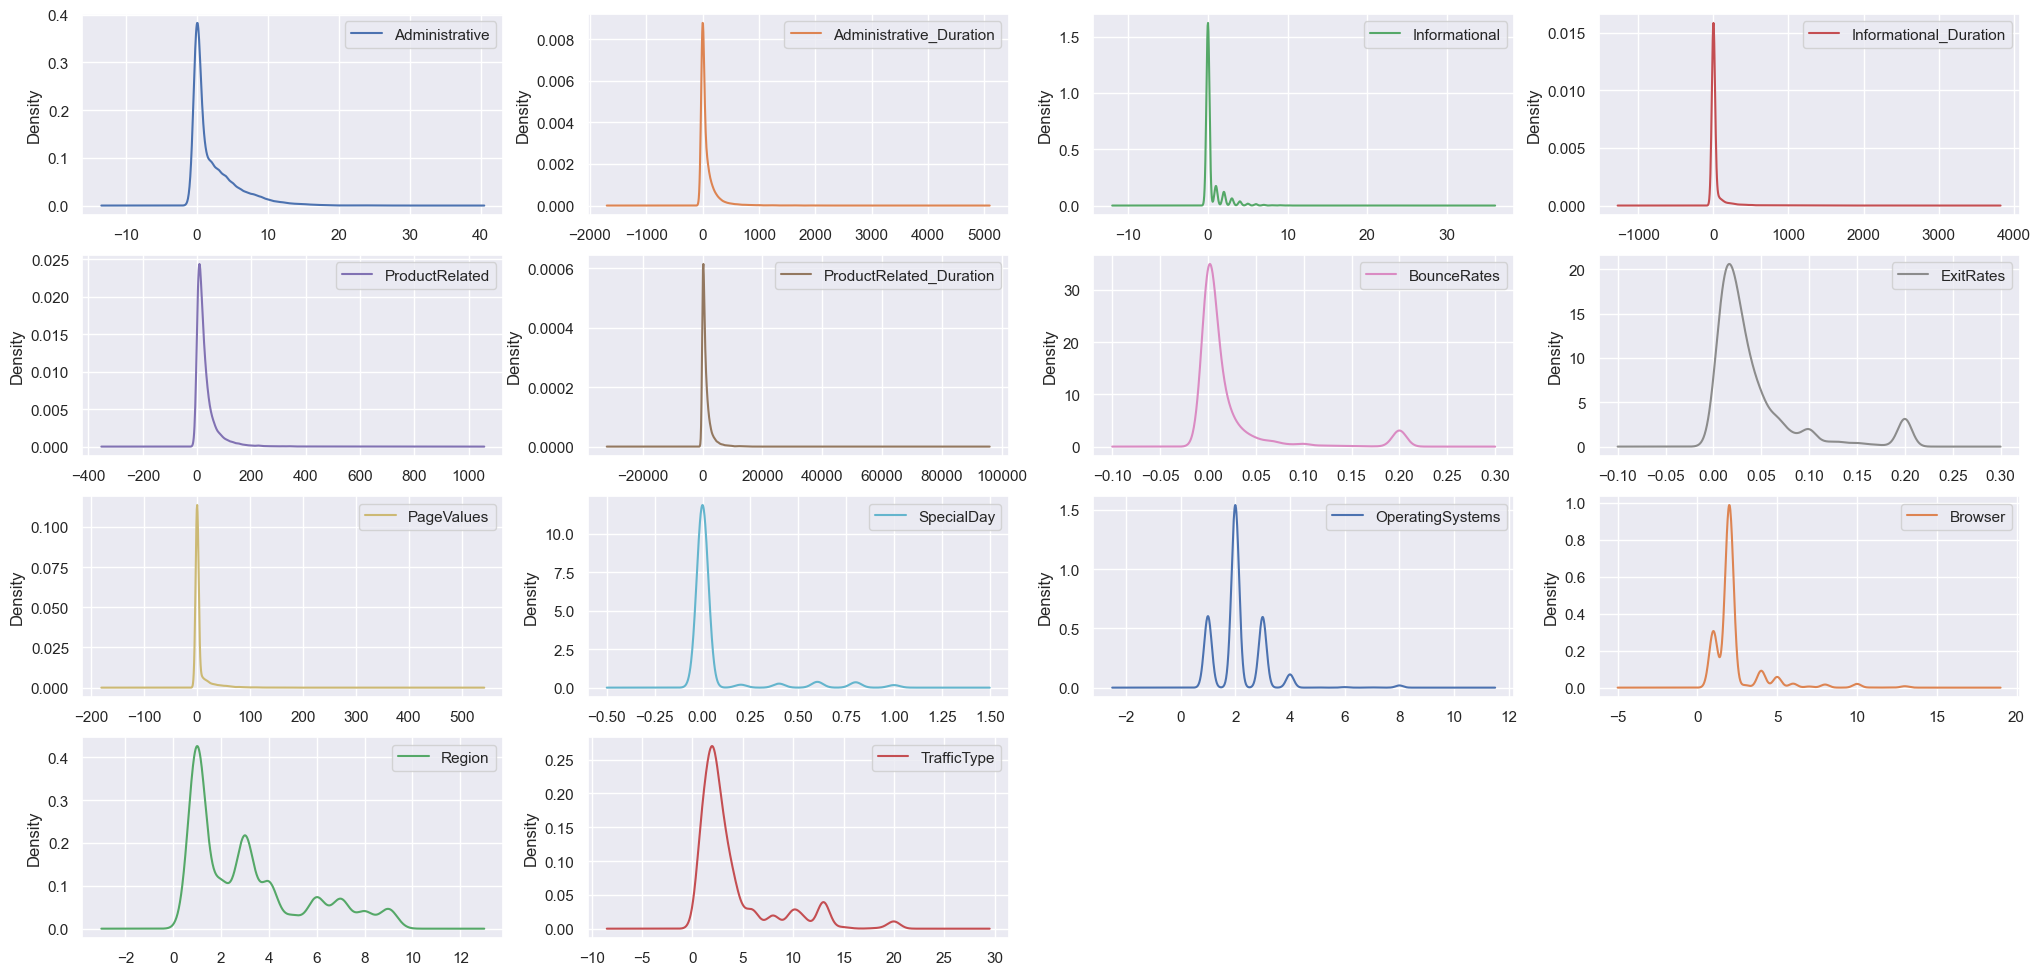

In [93]:
df[num_cols].plot(kind = "density", subplots = True, layout = (4,4), sharex = False, figsize = (25, 12))

Administrative                AxesSubplot(0.125,0.712609;0.168478x0.167391)
Administrative_Duration    AxesSubplot(0.327174,0.712609;0.168478x0.167391)
Informational              AxesSubplot(0.529348,0.712609;0.168478x0.167391)
Informational_Duration     AxesSubplot(0.731522,0.712609;0.168478x0.167391)
ProductRelated                AxesSubplot(0.125,0.511739;0.168478x0.167391)
ProductRelated_Duration    AxesSubplot(0.327174,0.511739;0.168478x0.167391)
BounceRates                AxesSubplot(0.529348,0.511739;0.168478x0.167391)
ExitRates                  AxesSubplot(0.731522,0.511739;0.168478x0.167391)
PageValues                     AxesSubplot(0.125,0.31087;0.168478x0.167391)
SpecialDay                  AxesSubplot(0.327174,0.31087;0.168478x0.167391)
OperatingSystems            AxesSubplot(0.529348,0.31087;0.168478x0.167391)
Browser                     AxesSubplot(0.731522,0.31087;0.168478x0.167391)
Region                            AxesSubplot(0.125,0.11;0.168478x0.167391)
TrafficType 

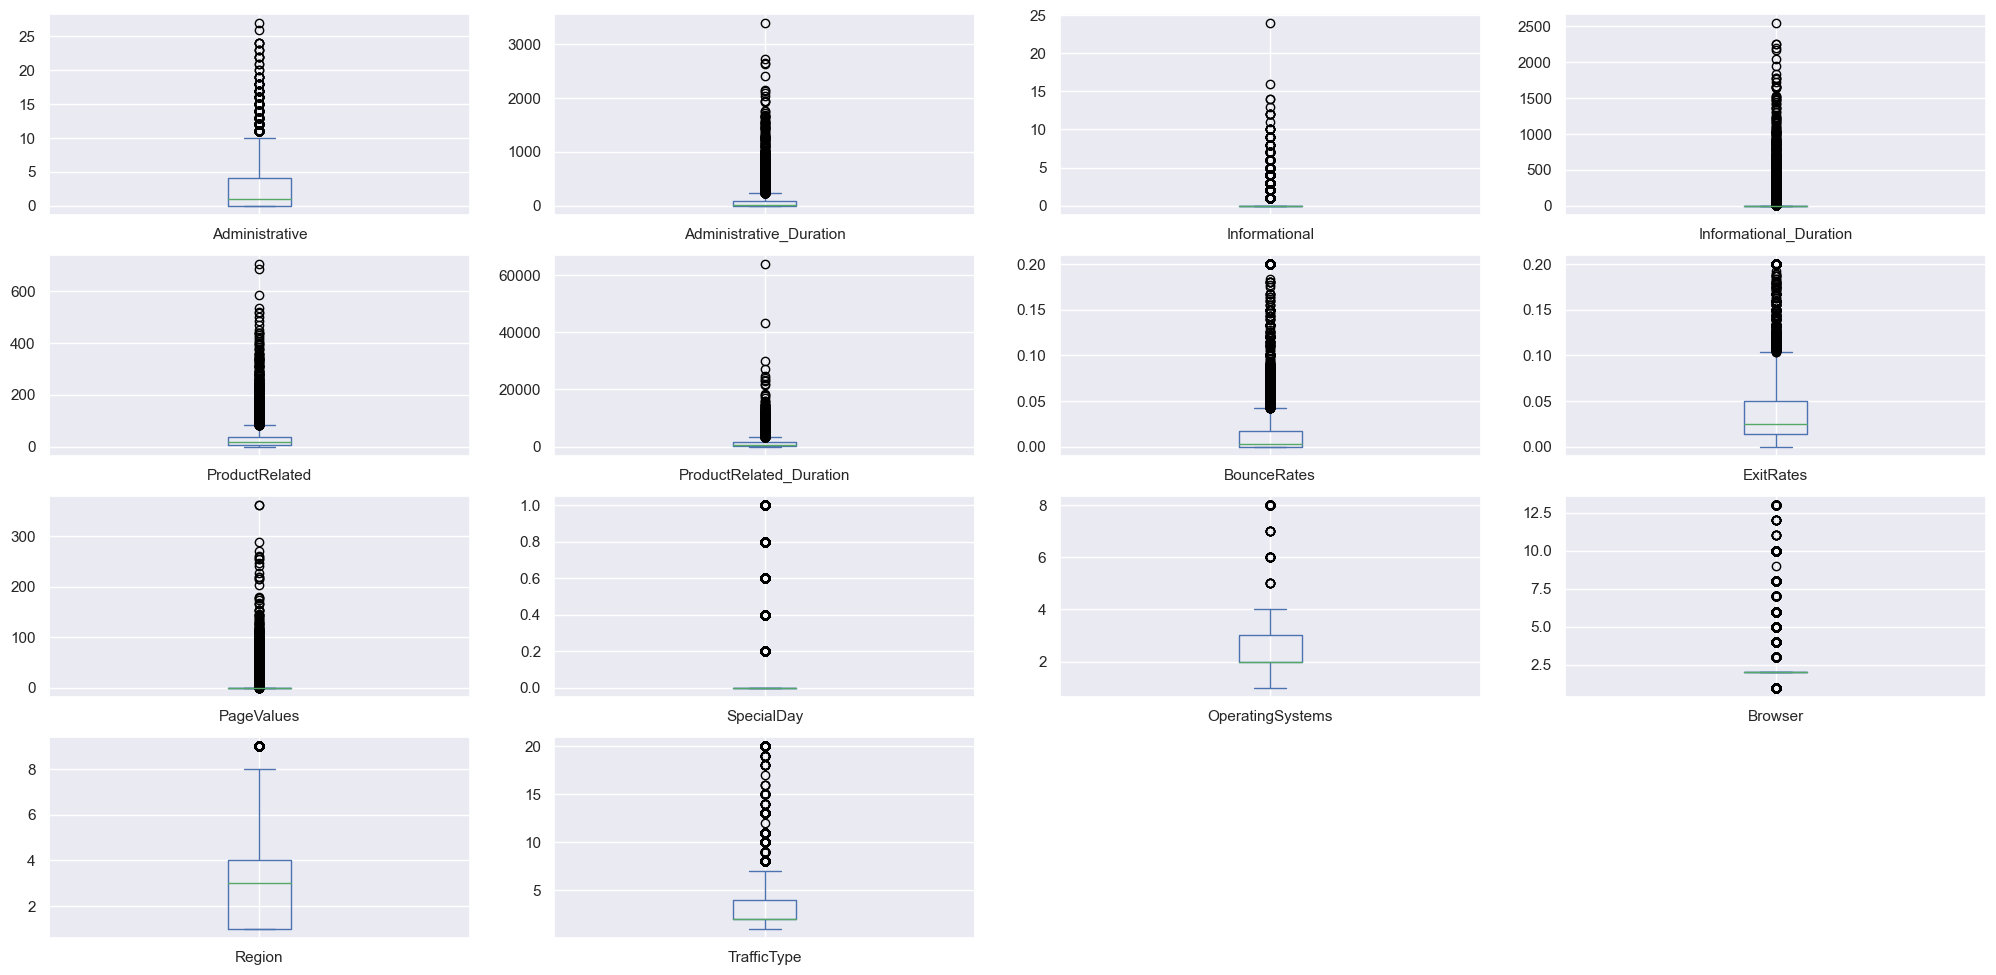

In [94]:
df[num_cols].plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, figsize=(25,12))

In [95]:
def show_cout_plot(df, col, rotation = 90, figsize = (12,6), hue = None, color = 'orange'):
    plt.figure(figsize = figsize)
    ax = sns.countplot(x = df[col], order = df[col].value_counts(ascending = False).head(10).index, hue = hue, color = color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation, size = 22)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = rotation, size = 22)
    ax.set_ylabel('Count',size = 25)
    ax.set_xlabel(col, size = 25)
    abs_values = df[col].value_counts(ascending = False).head(10)
    rel_values = df[col].value_counts(ascending = False, normalize= True).head(10).values*100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container = ax.containers[0], label = labels, size = 22)

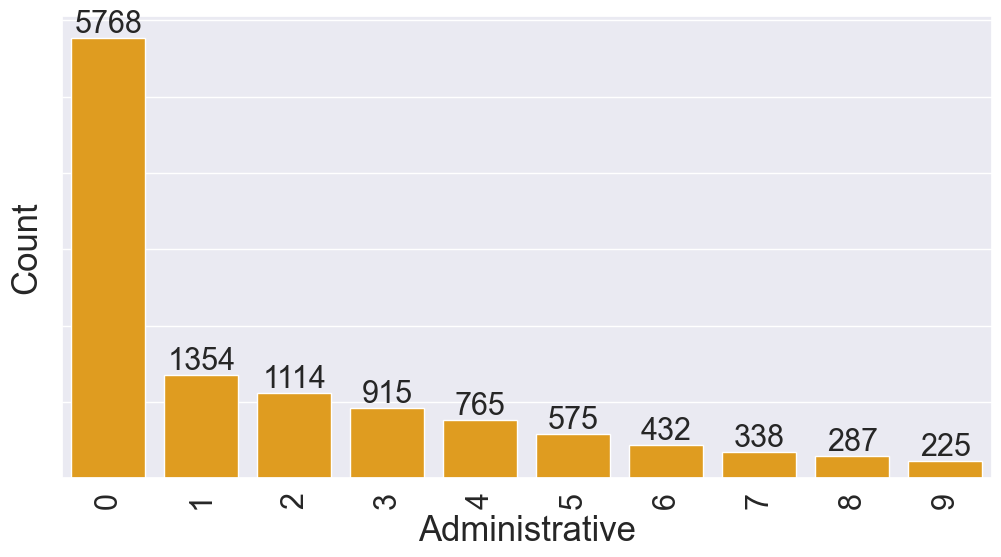

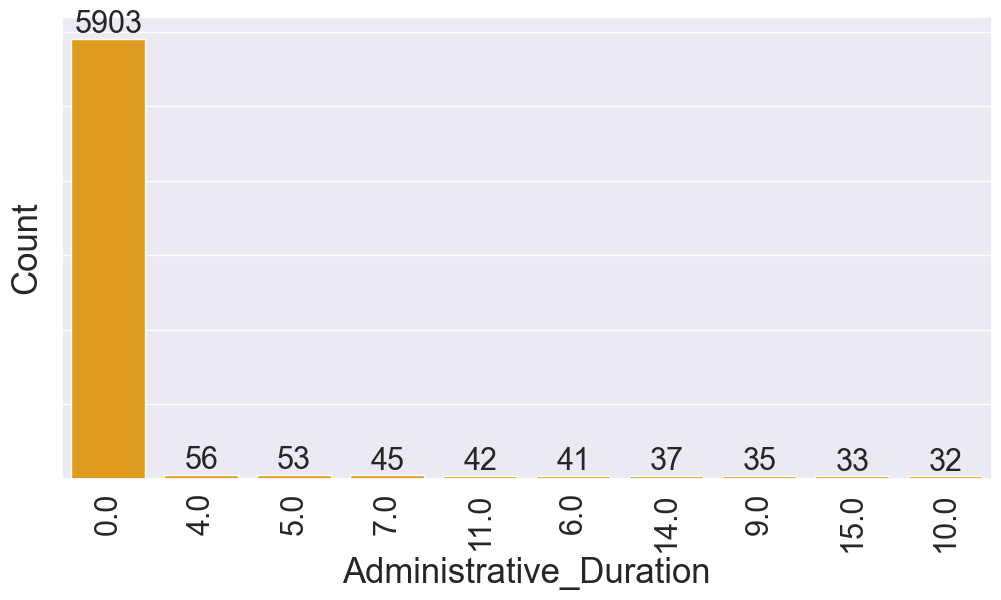

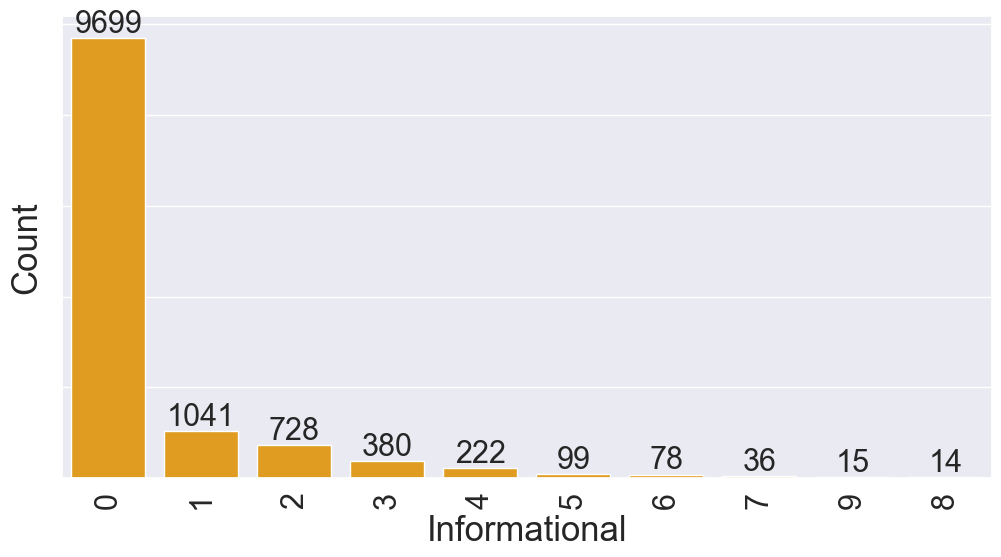

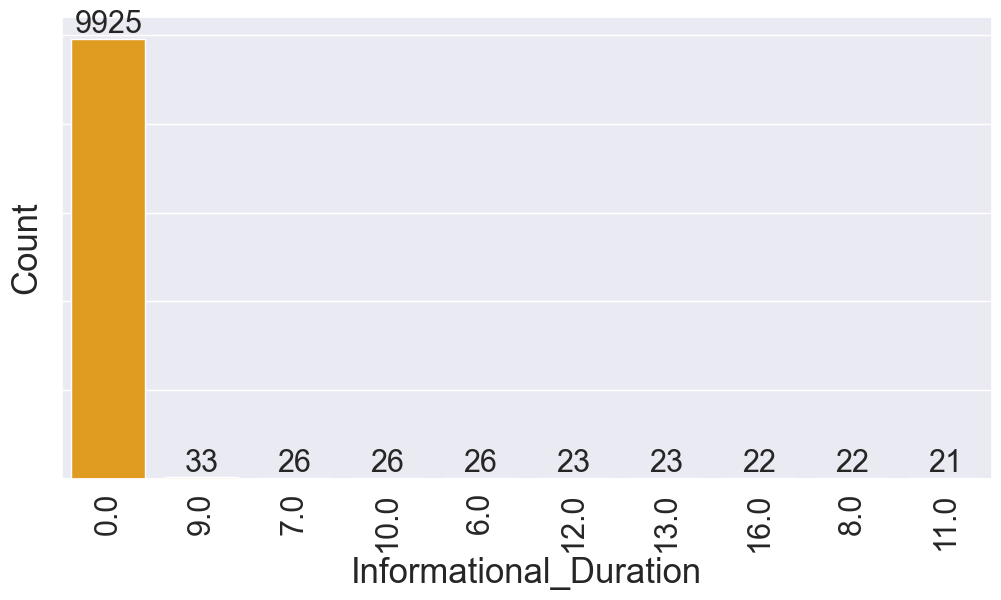

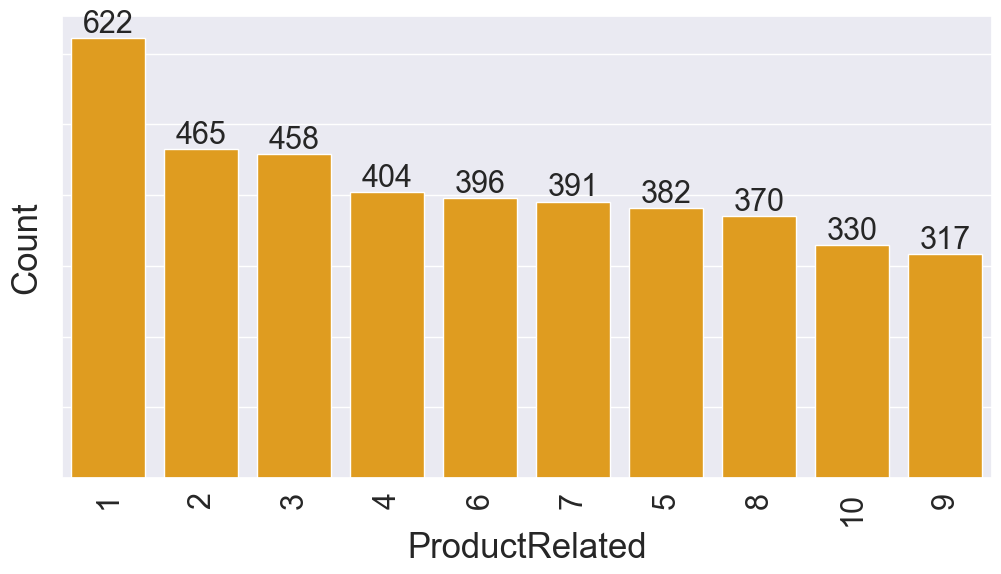

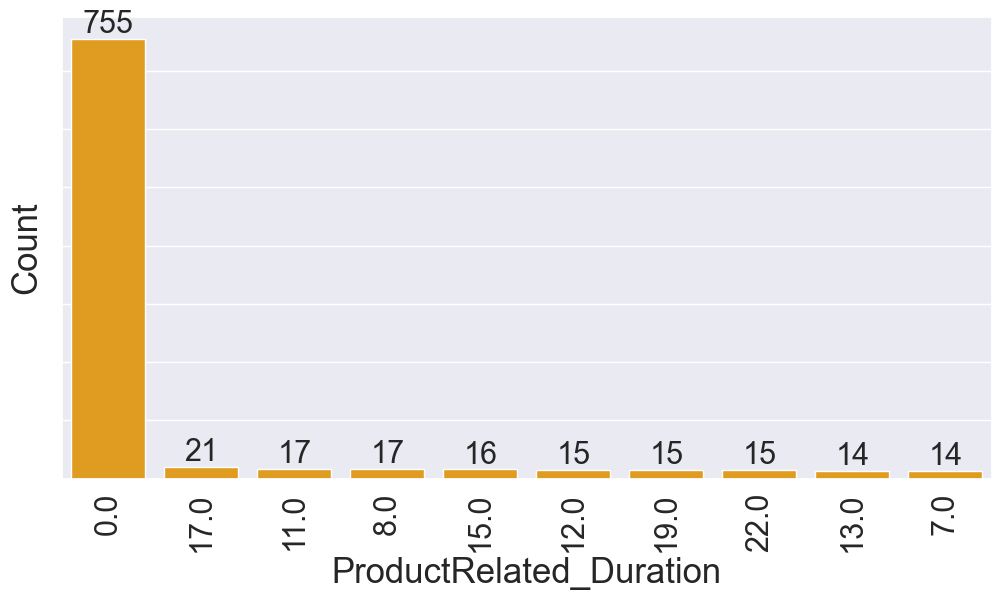

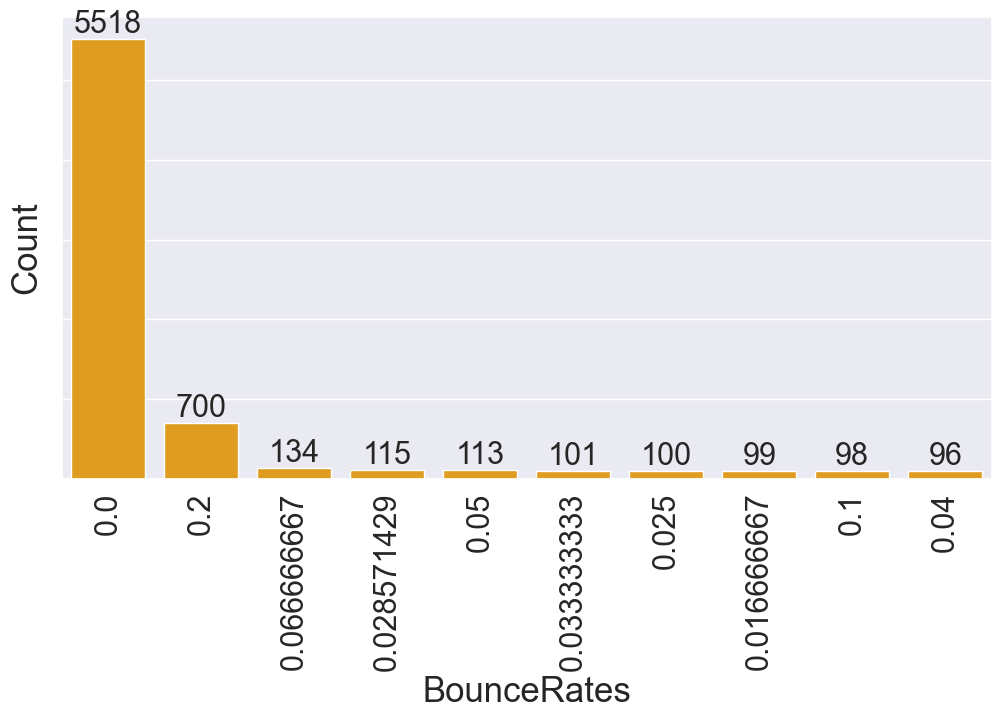

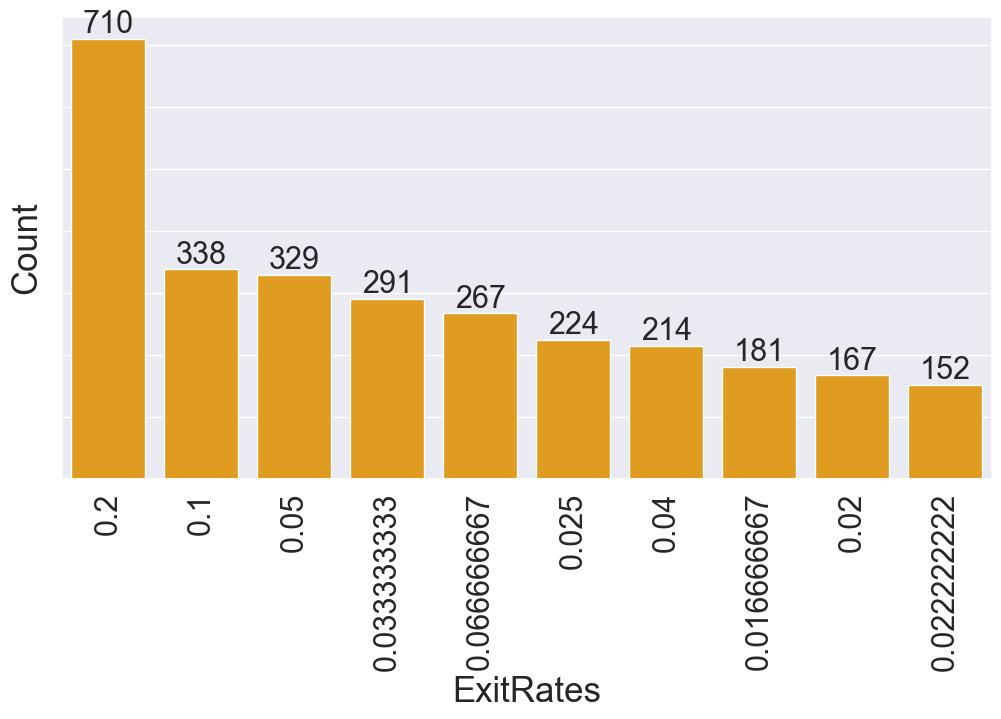

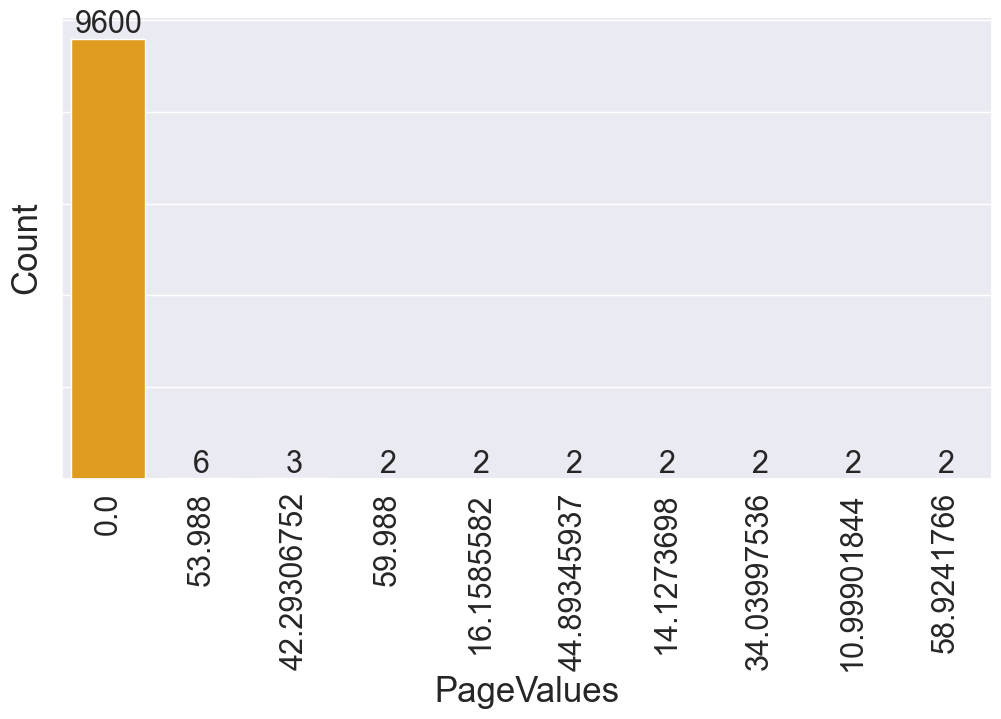

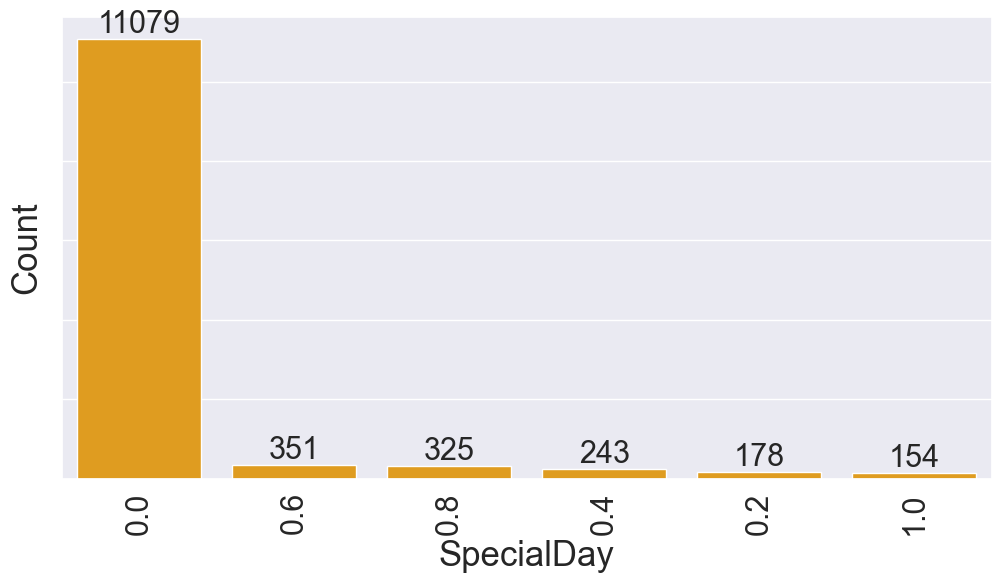

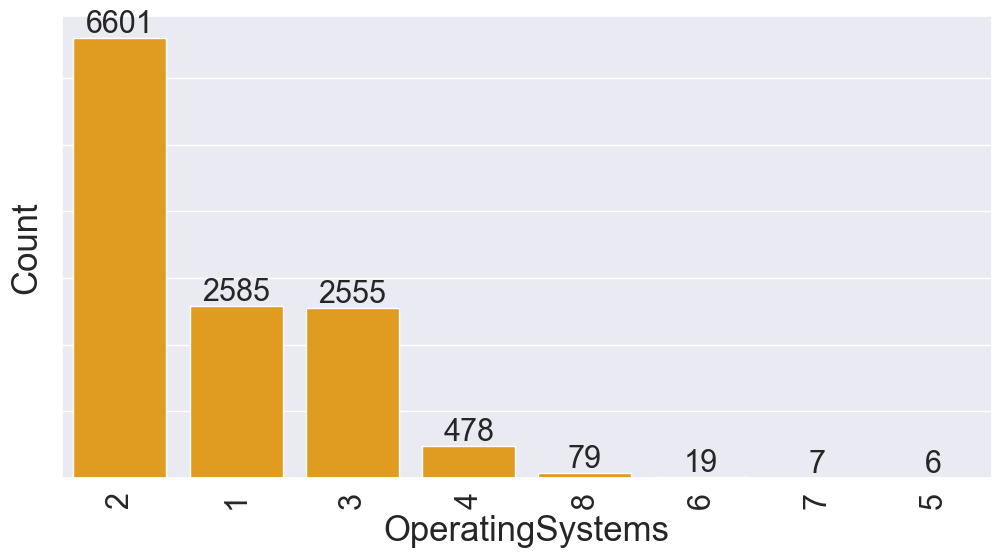

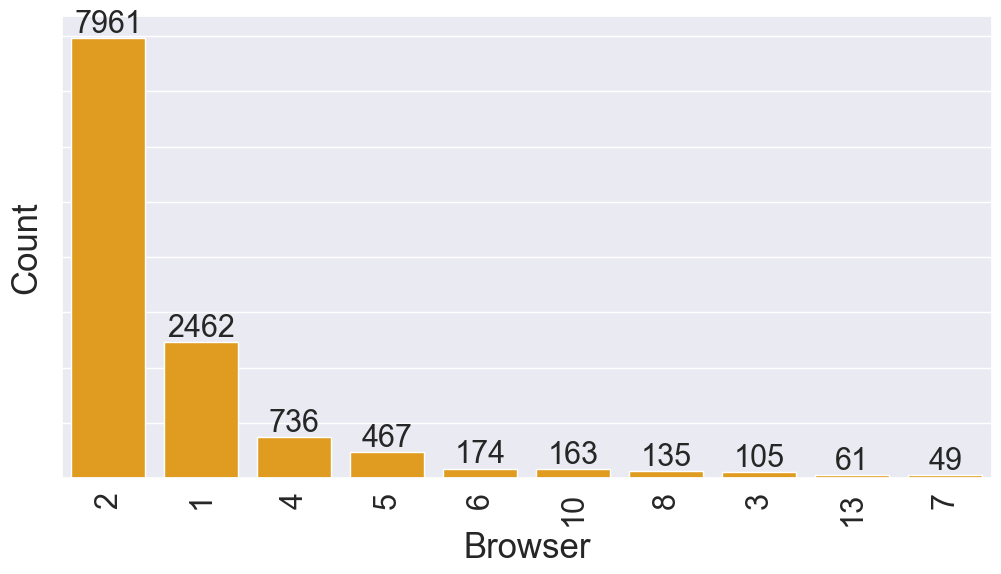

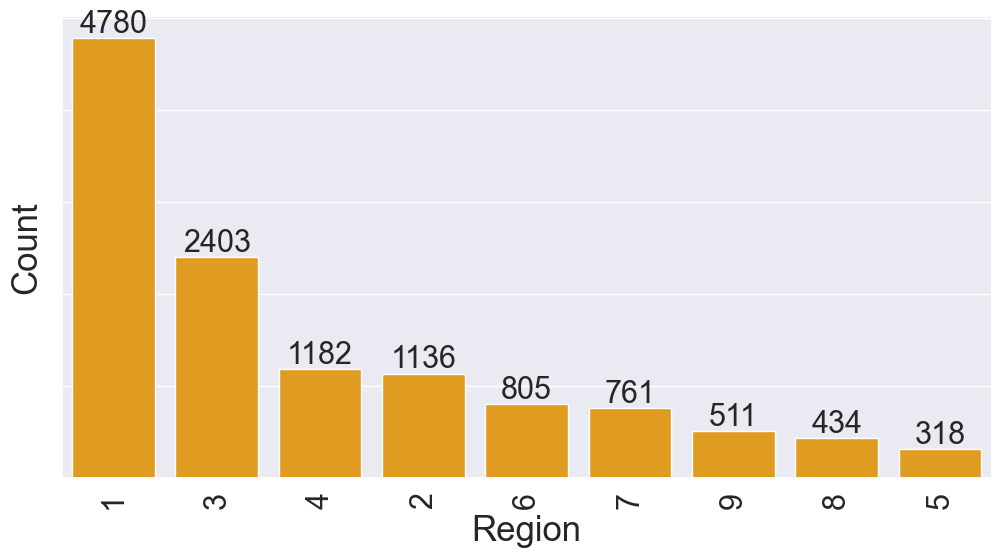

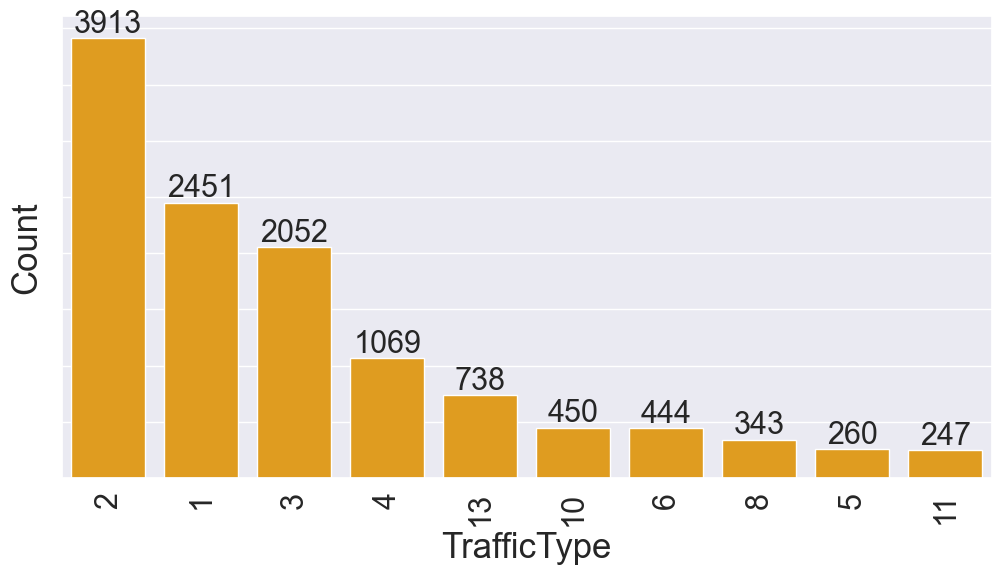

In [96]:
for i in range(len(num_cols)):
    show_cout_plot(df, num_cols[i])

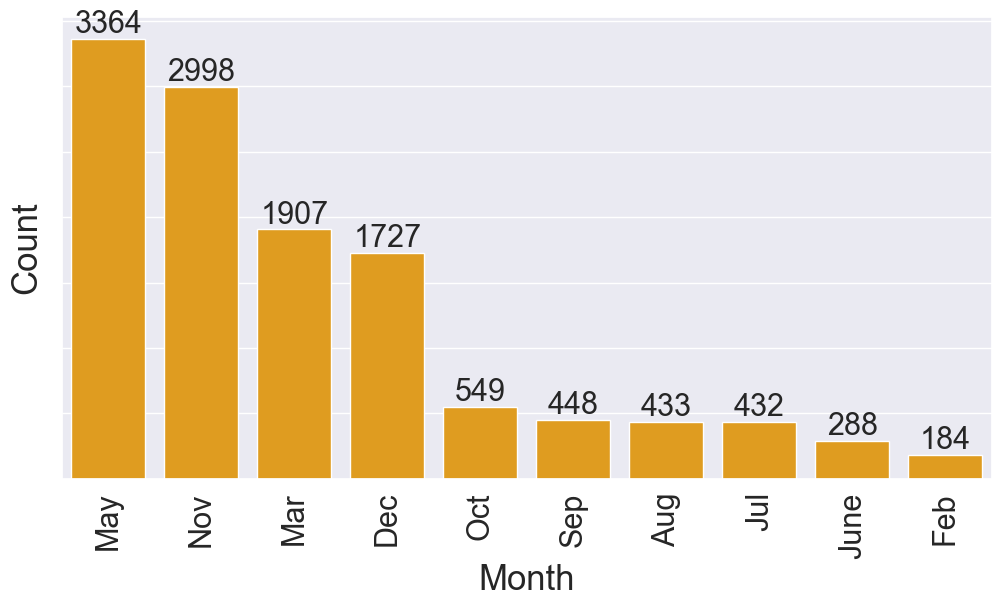

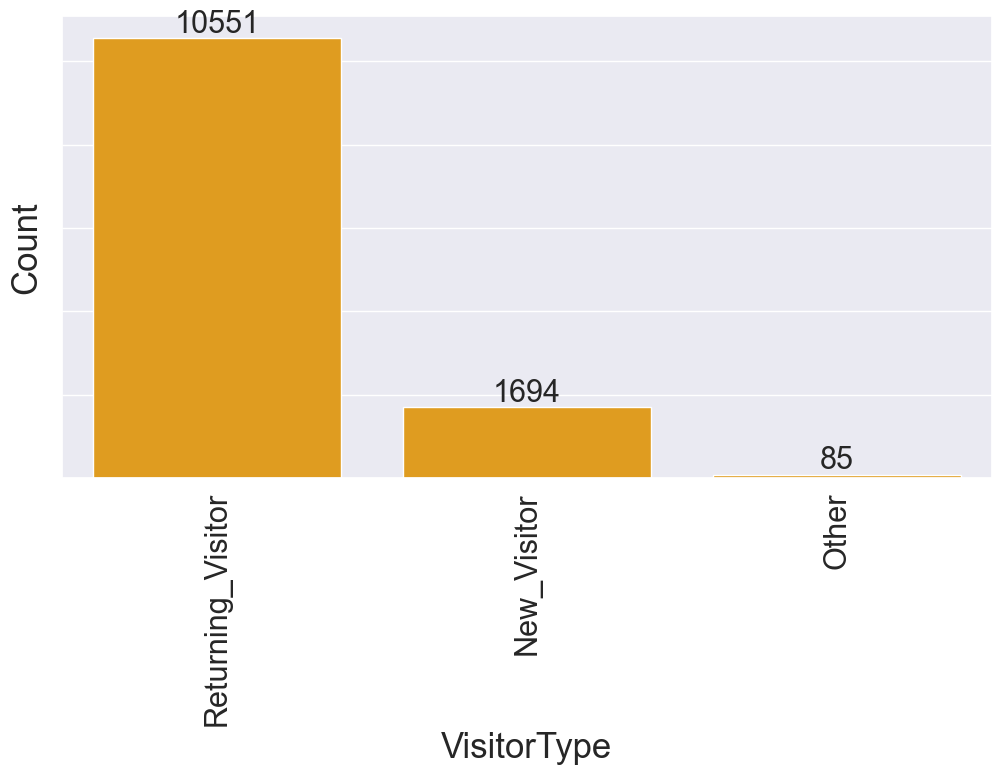

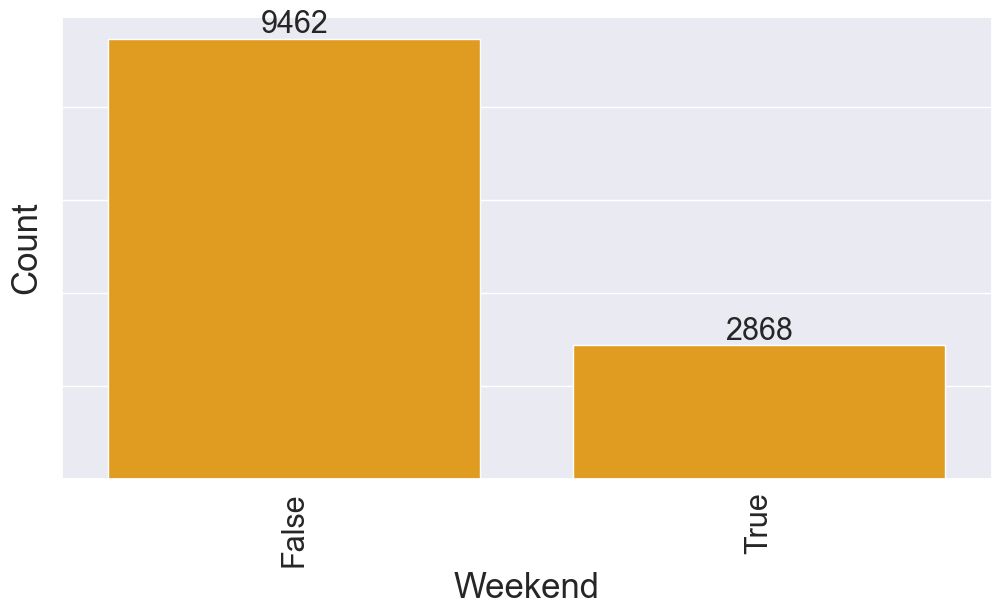

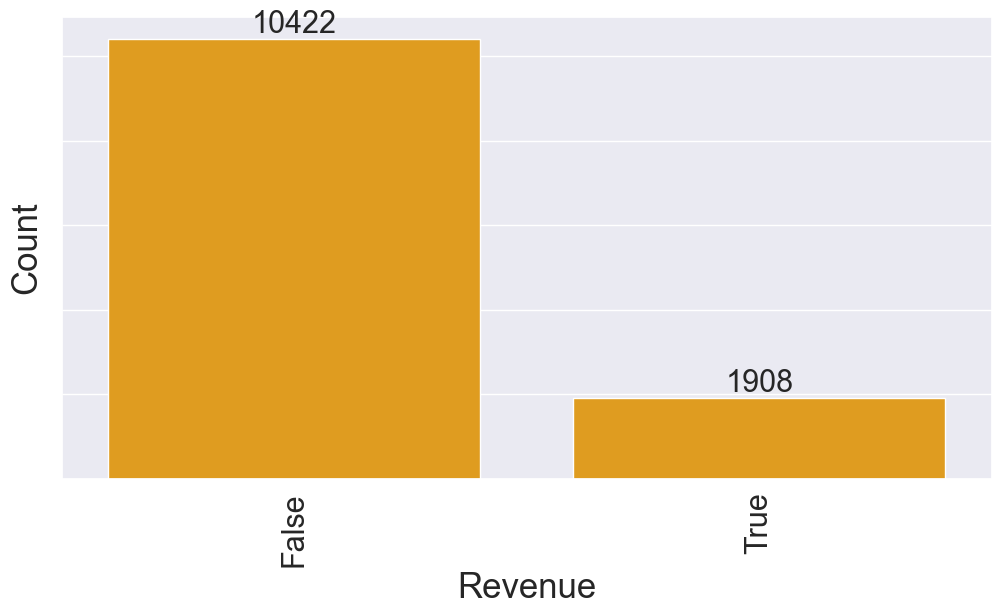

In [97]:
for i in range(len(cat_cols)):
    show_cout_plot(df, cat_cols[i])

In [98]:
def show_cout_plot2(df, col, rotation = 0, figsize = (12,6), hue = None, color = 'pink'):
    plt.figure(figsize = figsize)
    ax = sns.countplot(x = df[col], order = df[col].value_counts(ascending = False).index, hue = hue, color = color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation, size = 8)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = rotation, size = 8)
    
    ax.set_ylabel("count", size = 10)
    ax.set_xlabel(col, size = 10)
    abs_values = df[col].value_counts(ascending = False)
    rel_values = df[col].value_counts(ascending = False, normalize=True).values*100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container = ax.containers[0], labels= labels, size = 8)

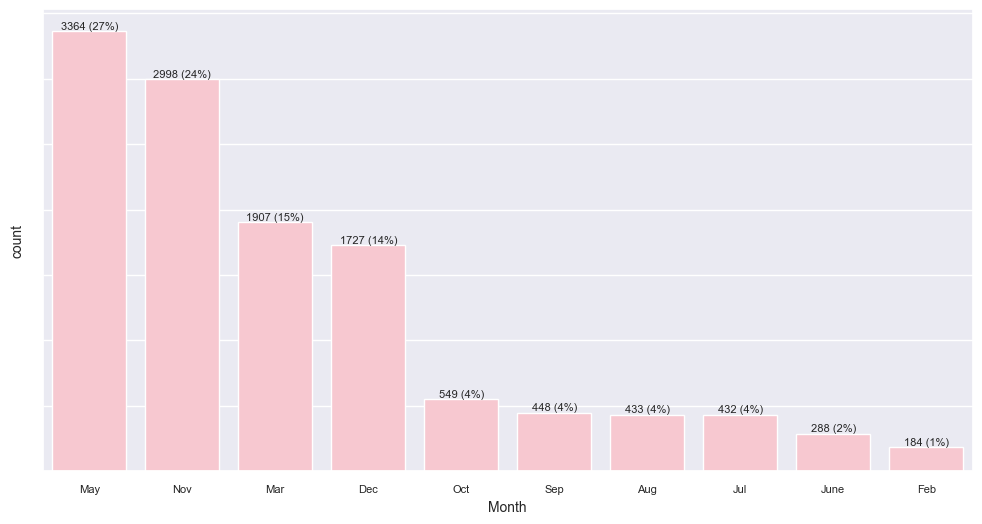

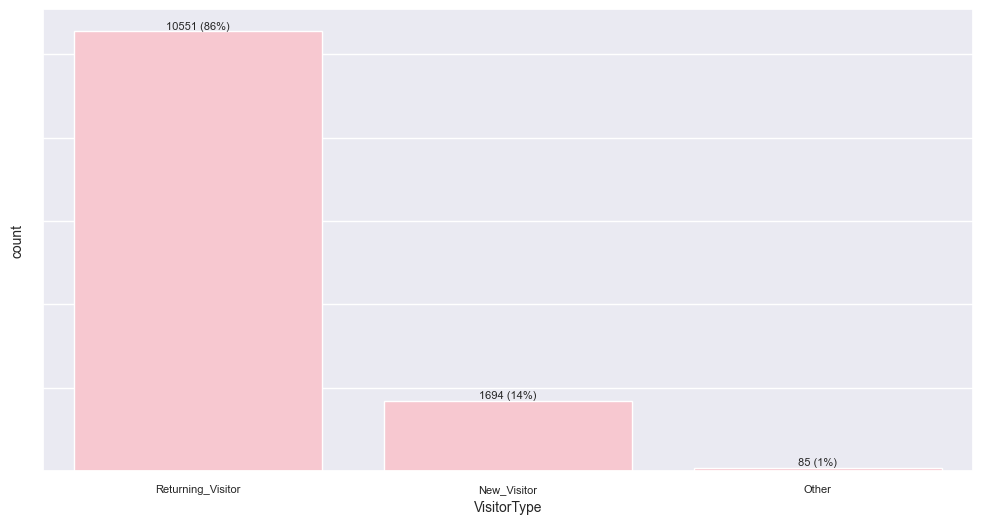

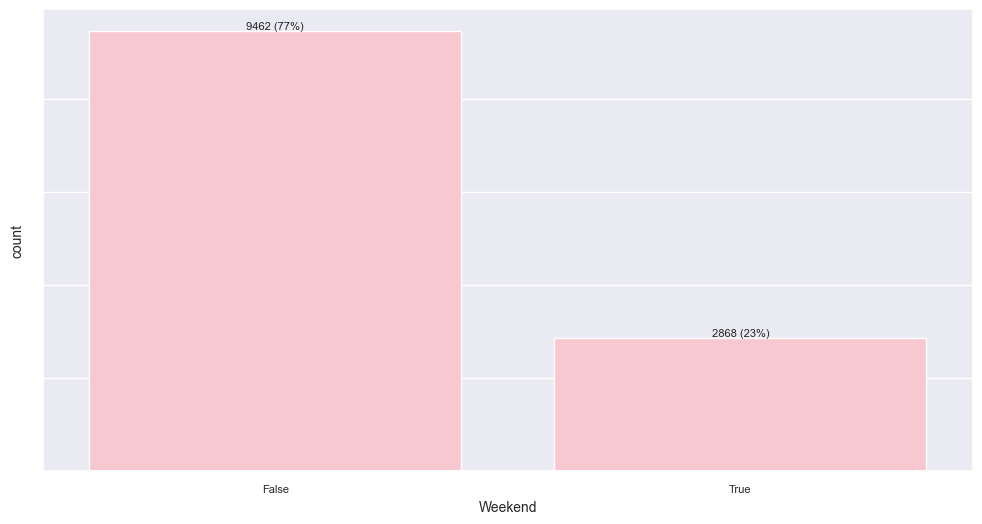

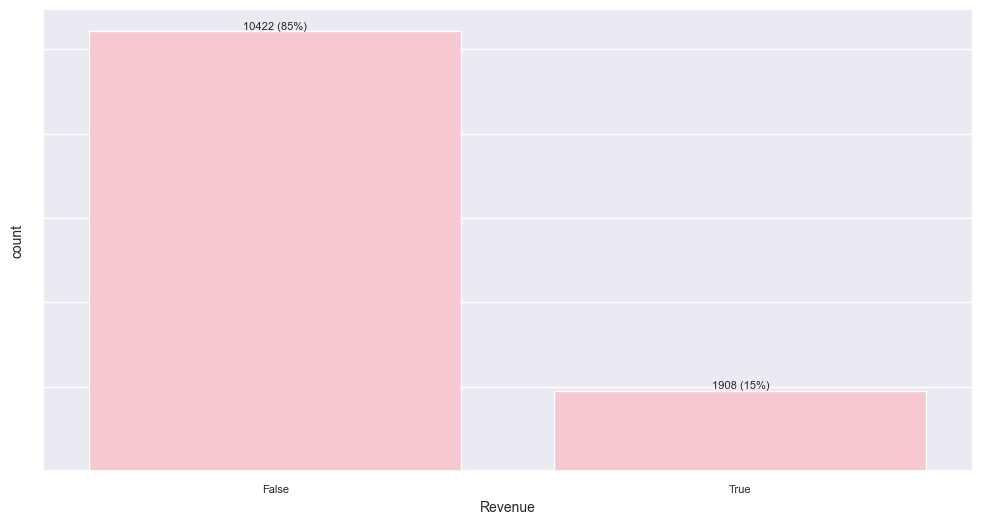

In [99]:
for i in range(len(cat_cols)):
    show_cout_plot2(df, cat_cols[i])

In [100]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [101]:
Month ={'Feb':2, 'Mar':3, 'May': 5, 'Oct': 10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month'] = df["Month"].map(Month)

In [102]:
visitor_encoder = pd.get_dummies(df['VisitorType'], prefix = "VisitorType", drop_first = True)
df = pd.concat([df, visitor_encoder], axis = 1).drop(['VisitorType'], axis = 1)

In [103]:
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

<AxesSubplot:>

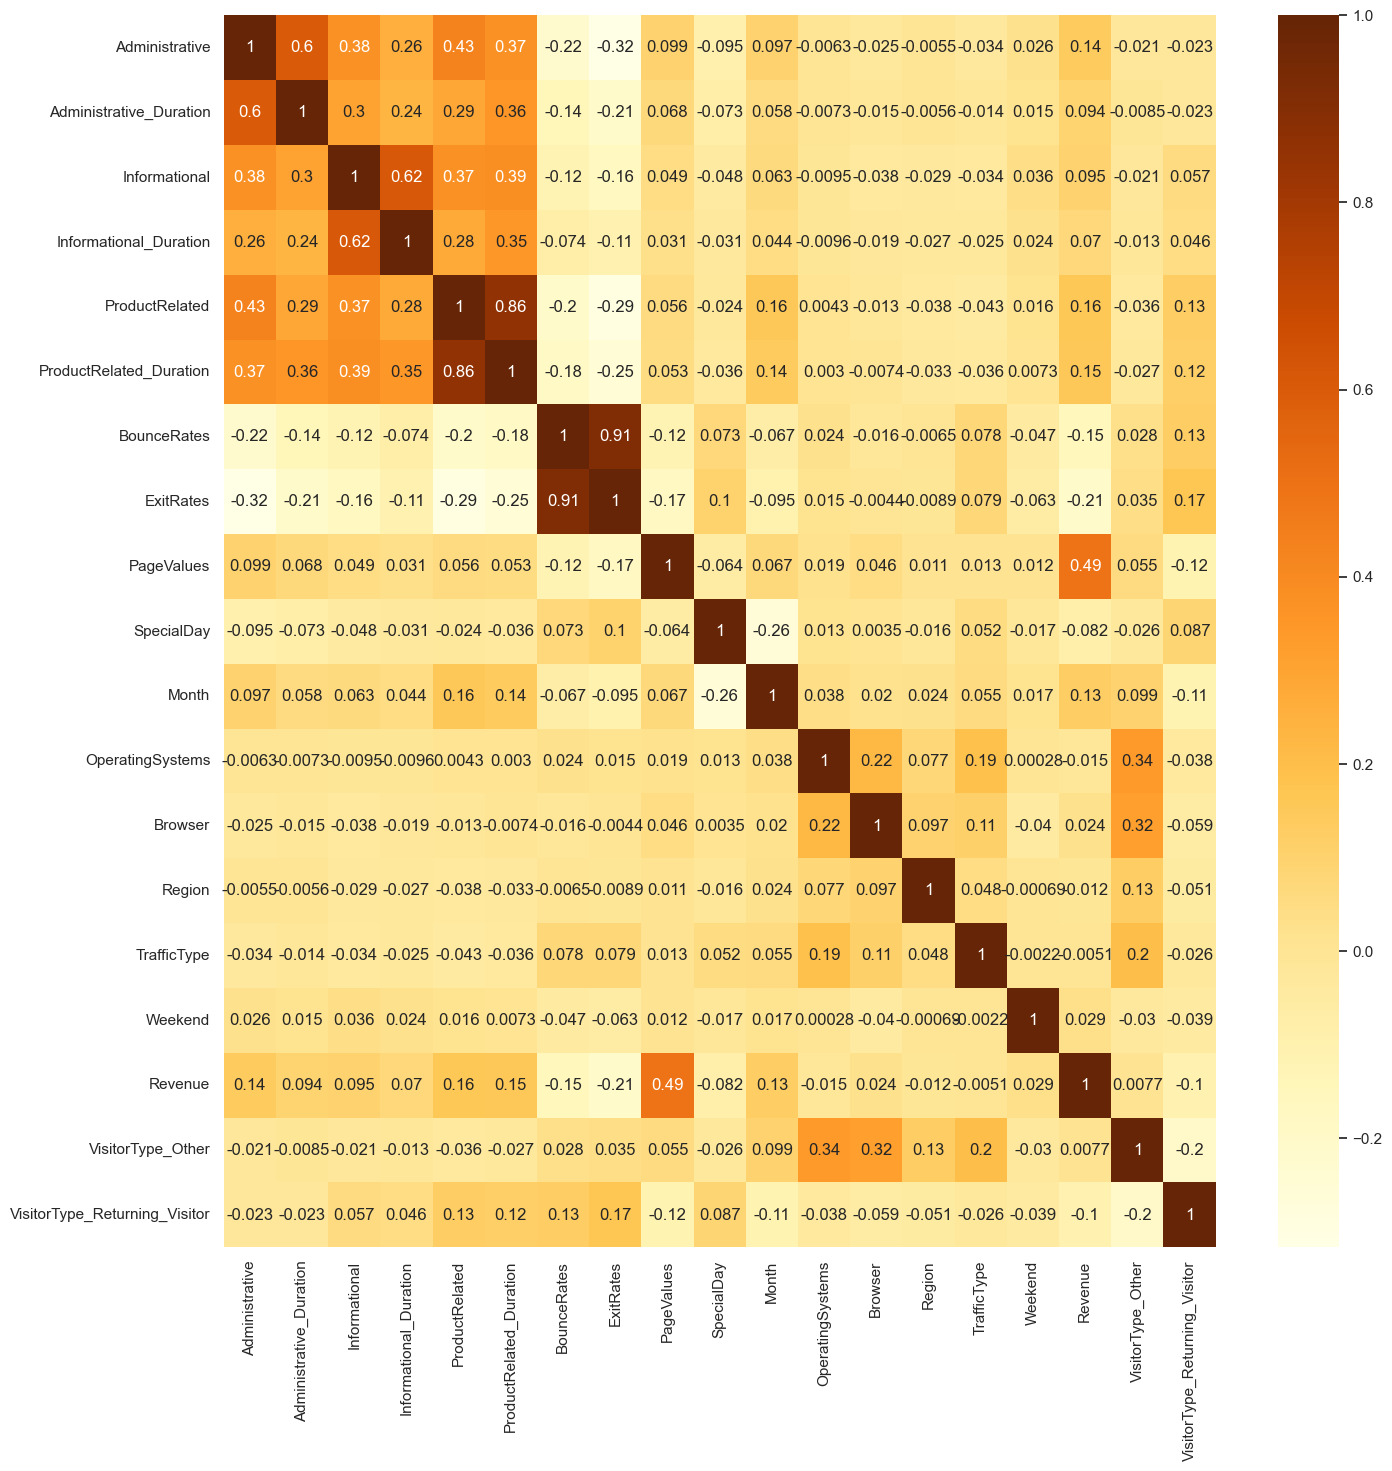

In [104]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, annot = True, cmap = "YlOrBr")

In [105]:
df1 = df.drop(['Month', 'Browser', "OperatingSystems", 'Region', 'TrafficType', 'Weekend','VisitorType_Other'], axis = 1)

In [106]:
X = df1.drop(['Revenue'], axis = 1)

In [107]:
y= df1[['Revenue']]

In [108]:
m_sc1 = standard()
scaled_X = m_sc1.fit_transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y)

In [110]:
X_train

array([[-0.09488246, -0.27333869, -0.3964779 , ..., -0.31717784,
        -0.30882137,  0.41062101],
       [ 0.20617279, -0.31576624, -0.3964779 , ..., -0.31717784,
        -0.30882137, -2.43533571],
       [ 0.20617279,  0.05589908,  1.96553169, ...,  0.74646053,
        -0.30882137,  0.41062101],
       ...,
       [-0.09488246, -0.32708025, -0.3964779 , ..., -0.31717784,
        -0.30882137, -2.43533571],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.31717784,
        -0.30882137,  0.41062101],
       [ 1.71144906,  0.92971802,  1.17819516, ...,  0.17146968,
        -0.30882137,  0.41062101]])

In [111]:
def model_report(model, x_train, y_train, x_test, y_test, name):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    recallscore = recall_score(y_test, predictions)
    precesion = precision_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    f1score = f1_score(y_test, predictions)
    
    score = pd.DataFrame({
        "Model": [name],
        "Accuracy_score" : [accuracy],
        "Recall_score" :[recallscore],
        "Precision": [precesion],
        "f1_score": [f1score],
        "Area_under_curce":[roc_auc]
    })
    return score

In [112]:
m_rf = RandomForestClassifier()
model1 = model_report(m_rf, X_train, y_train, X_test, y_test, "Random Forest")
model1

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,Random Forest,0.887772,0.540918,0.700258,0.61036,0.747996


In [113]:
m_xgb = XGBClassifier()
model2 = model_report(m_xgb, X_train, y_train, X_test, y_test, "XGBOOST")
model2

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,XGBOOST,0.88615,0.55489,0.684729,0.61301,0.752658


In [114]:
m_svc = SVC()
model3 = model_report(m_svc, X_train, y_train, X_test, y_test, "SVC")
model3

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,SVC,0.887123,0.467066,0.742857,0.573529,0.717847


In [115]:
m_knn = KNeighborsClassifier()
model4 = model_report(m_knn, X_train, y_train, X_test, y_test, "KNN")
model4

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,KNN,0.881284,0.493014,0.688022,0.574419,0.724818


In [116]:
m_lgbm = LGBMClassifier()
model5 = model_report(m_lgbm, X_train, y_train, X_test, y_test, "LGBM Classifier")
model5

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,LGBM Classifier,0.891015,0.560878,0.707809,0.625835,0.757976


In [117]:
m_lr = LogisticRegression()
model6 = model_report(m_lr, X_train, y_train, X_test, y_test, "Linear Regression")
model6

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,Linear Regression,0.88096,0.379242,0.772358,0.508701,0.678776


In [118]:
model_performances = pd.concat([model1, model2, model3, model4, model5, model6], axis = 0).reset_index()
model_performances = model_performances.drop(columns = 'index', axis=1)
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,Random Forest,0.887772,0.540918,0.700258,0.610360,0.747996
1,XGBOOST,0.886150,0.554890,0.684729,0.613010,0.752658
2,SVC,0.887123,0.467066,0.742857,0.573529,0.717847
3,KNN,0.881284,0.493014,0.688022,0.574419,0.724818
4,LGBM Classifier,0.891015,0.560878,0.707809,0.625835,0.757976
5,Linear Regression,0.880960,0.379242,0.772358,0.508701,0.678776


In [119]:
m_asn = ADASYN()
X_resampled, y_resampled = m_asn.fit_resample(X, y)
y_resampled.value_counts()

Revenue
0          10422
1          10378
dtype: int64

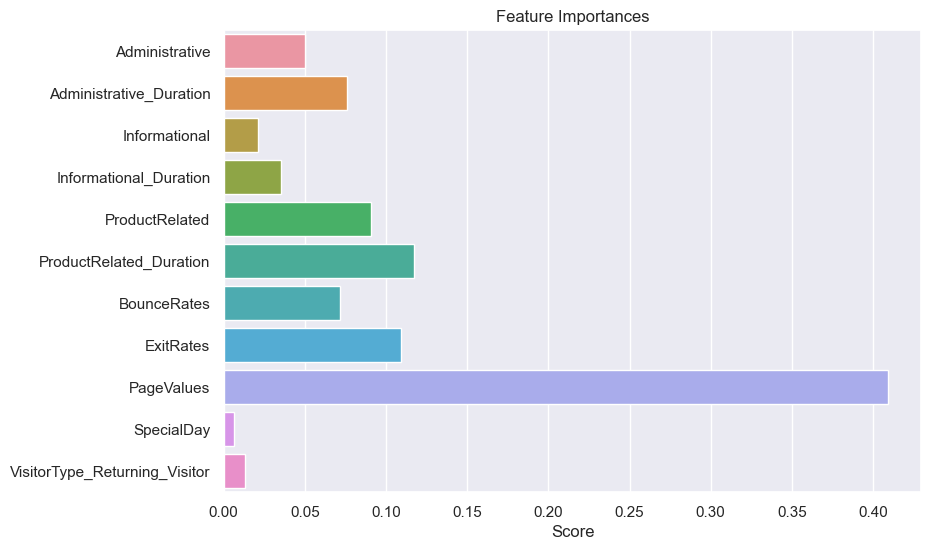

In [120]:
sns.set(rc = {'figure.figsize':(9,6)})
importances = pd.DataFrame(m_rf.feature_importances_, index = X.columns, columns =['Score'])
ax1 = sns.barplot(data = importances, x=importances['Score'], y=importances.index)
ax1.set_title("Feature Importances")
plt.show()

In [121]:
selected_X = X_resampled.loc[:,["Administrative", "Administrative_Duration", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"]]

In [122]:
m_sc2 = standard()
scaled_X2 = m_sc2.fit_transform(selected_X)

In [123]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_X2, y_resampled)

In [124]:
y_train2.shape

(15600, 1)

In [125]:
params_1 = {
    "n_estimators": [50,100, 200, 300],
    "max_depth": [None, 8, 16, 24],
    "min_samples_leaf": [1, 6, 12],
    "min_samples_split": [2, 8, 16]
}

grid_cv1 = GridSearchCV(m_rf, param_grid=params_1, cv=3, n_jobs =-1)
grid_cv1.fit(X_train2, y_train2)

print("Best param: \n", grid_cv1.best_params_)
print("Best Score: \n", grid_cv1.best_score_)

Best param: 
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 
 0.9110897435897436


In [126]:
params_2 = {
    "max_depth": [10,20,30],
    "learning_rate": [0.1, 0.01, 0.001],
    "gamma": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_cv2 = GridSearchCV(m_xgb, param_grid=params_2, cv=3, n_jobs =-1)
grid_cv2.fit(X_train2, y_train2)

print("XGB Best param: \n", grid_cv2.best_params_)
print("XGB Best Score: {0:.4f}".format(grid_cv2.best_score_))

XGB Best param: 
 {'colsample_bytree': 0.8, 'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 30}
XGB Best Score: 0.9131


In [127]:
params_3 = {
    "max_depth": [10,20,30],
    "learning_rate": [0.1, 0.01, 0.001],
    "num_leaves": [20, 30, 40],
    "min_child_samples": [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
}

grid_cv3 = GridSearchCV(m_lgbm, param_grid=params_3, cv=3, n_jobs =-1)
grid_cv3.fit(X_train2, y_train2)

print("m_lgbm Best param: \n", grid_cv3.best_params_)
print("m_lgbm Best Score: {0:.4f}".format(grid_cv3.best_score_))

m_lgbm Best param: 
 {'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 10, 'num_leaves': 40, 'subsample': 0.8}
m_lgbm Best Score: 0.9065


In [128]:
X_train2.shape

(15600, 8)

In [129]:
m_rf2 = RandomForestClassifier(n_estimators=100,
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1)
model_rf = model_report(m_rf2, X_train2, y_train2, X_test2, y_test2, "Random Forest")
model_rf

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,Random Forest,0.917692,0.935917,0.903333,0.919337,0.91765


In [130]:
m_xgb2 = XGBClassifier(colsample_bytree = 0.8,
                      gamma = 0.5,
                      learning_rate = 0.1,
                      max_depth = 30,
                      subsample = 1.0)
model_xgb = model_report(m_xgb2, X_train2, y_train2, X_test2, y_test2, "XGBOOST")
model_xgb

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,XGBOOST,0.919615,0.940906,0.902798,0.921458,0.919566


In [131]:
m_lgbm2 = LGBMClassifier(learning_rate = 0.1,
                       max_depth = 10,
                       min_child_samples = 1,
                       num_leaves = 40, 
                       subsample = 0.8)
model_lgbm = model_report(m_lgbm2, X_train2, y_train2, X_test2, y_test2, "Light Boosting")
model_lgbm

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,Light Boosting,0.908654,0.919417,0.900413,0.909816,0.908629


In [132]:
model_preferences2 = pd.concat([model_rf, model_xgb, model_lgbm])
model_preferences2


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curce
0,Random Forest,0.917692,0.935917,0.903333,0.919337,0.917650
0,XGBOOST,0.919615,0.940906,0.902798,0.921458,0.919566
0,Light Boosting,0.908654,0.919417,0.900413,0.909816,0.908629
